In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("../data/diabetes.csv")

In [4]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in zero_not_accepted:
    # Replace zeros with NA
    dataset[column] = dataset[column].replace(0, pd.NA)
    if dataset[column].notna().any():
        mean = dataset[column].mean(skipna=True)
        dataset[column] = dataset[column].fillna(mean)
    dataset[column] = pd.to_numeric(dataset[column], errors='coerce')



C:\Users\asus\AppData\Local\Temp\ipykernel_14252\106684553.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[column] = dataset[column].fillna(mean)


In [6]:
X = dataset.iloc[:, :-1]  
y = dataset.iloc[:, -1]  

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
[[82 17]
 [21 34]]
Accuracy: 75.32%


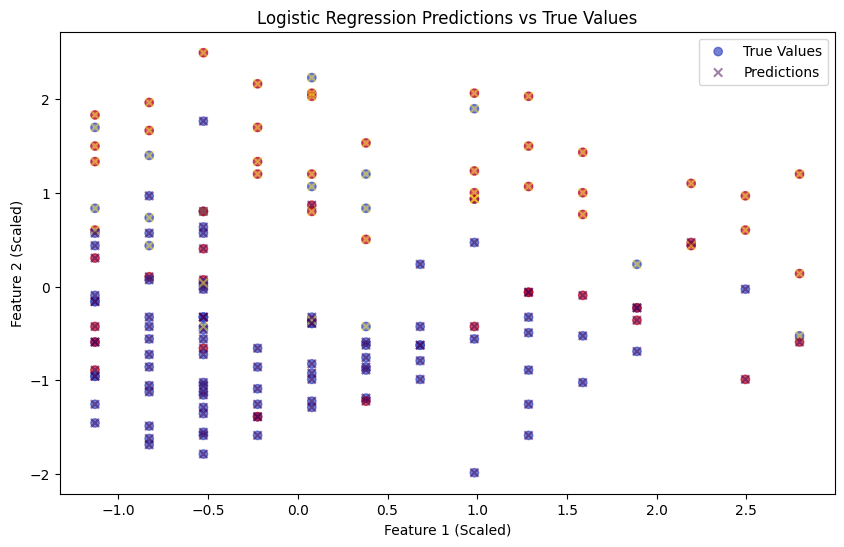

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', label='True Values', alpha=0.7)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', marker='x', label='Predictions', alpha=0.5)
plt.title('Logistic Regression Predictions vs True Values')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.show()